In [1]:
from sklearn import datasets, neighbors, metrics
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

AxesSubplot(0.125,0.125;0.775x0.755)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


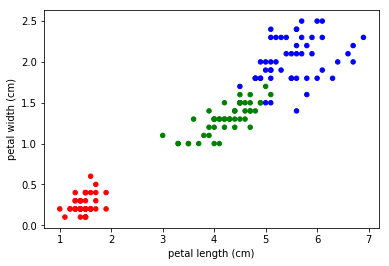

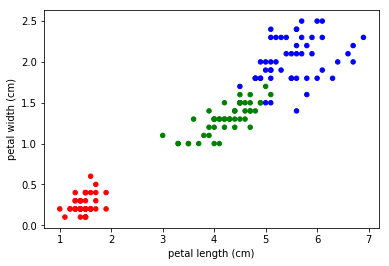

In [3]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.describe()

def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

predictions = irisdf.apply(my_classifier, axis=1)

AxesSubplot(0.125,0.125;0.775x0.755)


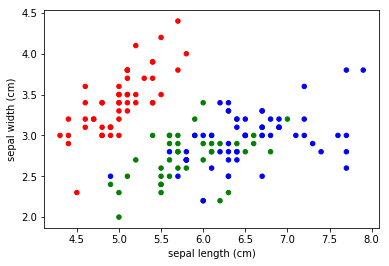

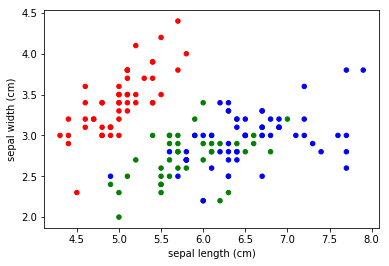

In [6]:
#AL: just curious 
irisdf.plot('sepal length (cm)', 'sepal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.plot('sepal length (cm)', 'sepal width (cm)', kind='scatter', c=irisdf.ctarget)

In [19]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,ctarget,predictions
0,5.1,3.5,1.4,0.2,0,r,0
1,4.9,3.0,1.4,0.2,0,r,0
2,4.7,3.2,1.3,0.2,0,r,0
3,4.6,3.1,1.5,0.2,0,r,0
4,5.0,3.6,1.4,0.2,0,r,0


In [4]:
irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.666666666667


### Starter Code

Work on improving the classifier below.

In [12]:
def my_classifier(row):
    #AL: Add classification
    if (row['petal length (cm)'] < 2) & (row['petal width (cm)'] < 0.9):
        return 0
    #AL: Add extra case
    elif (row['petal length (cm)'] < 5) & (row['petal width (cm)'] < 1.55):
        return 1
    else:
        return 2

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.966666666667


### Using distance: KNN implementation

In [13]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

iris = datasets.load_iris()
# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.96


In [24]:
#AL: 
print iris.data[:,2:]

[[ 1.4  0.2]
 [ 1.4  0.2]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 1.7  0.4]
 [ 1.4  0.3]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 1.5  0.1]
 [ 1.5  0.2]
 [ 1.6  0.2]
 [ 1.4  0.1]
 [ 1.1  0.1]
 [ 1.2  0.2]
 [ 1.5  0.4]
 [ 1.3  0.4]
 [ 1.4  0.3]
 [ 1.7  0.3]
 [ 1.5  0.3]
 [ 1.7  0.2]
 [ 1.5  0.4]
 [ 1.   0.2]
 [ 1.7  0.5]
 [ 1.9  0.2]
 [ 1.6  0.2]
 [ 1.6  0.4]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 1.6  0.2]
 [ 1.6  0.2]
 [ 1.5  0.4]
 [ 1.5  0.1]
 [ 1.4  0.2]
 [ 1.5  0.1]
 [ 1.2  0.2]
 [ 1.3  0.2]
 [ 1.5  0.1]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.3  0.3]
 [ 1.3  0.3]
 [ 1.3  0.2]
 [ 1.6  0.6]
 [ 1.9  0.4]
 [ 1.4  0.3]
 [ 1.6  0.2]
 [ 1.4  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 4.7  1.4]
 [ 4.5  1.5]
 [ 4.9  1.5]
 [ 4.   1.3]
 [ 4.6  1.5]
 [ 4.5  1.3]
 [ 4.7  1.6]
 [ 3.3  1. ]
 [ 4.6  1.3]
 [ 3.9  1.4]
 [ 3.5  1. ]
 [ 4.2  1.5]
 [ 4.   1. ]
 [ 4.7  1.4]
 [ 3.6  1.3]
 [ 4.4  1.4]
 [ 4.5  1.5]
 [ 4.1  1. ]
 [ 4.5  1.5]
 [ 3.9  1.1]
 [ 4.8  1.8]
 [ 4.   1.3]
 [ 4.9  1.5]
 [ 4.7  1.2]
 [ 4.3  1.3]
 [ 4.4  1.4]
 [ 4.8  1.4]

Do we see a change in performance when using the distance weight?

In [20]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') # add in the weights parameter here AL:distance
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.993333333333


### Solution to solving K

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive. Note the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [ ]:
from sklearn import grid_search, cross_validation
import matplotlib.pyplot as plt

# some n_list! keep in mind cross validation
# recall: what's an effective way to create a numerical list in python?
kf = cross_validation.KFold(len(irisdf), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(iris.data, iris.target)
gs.grid_scores_